Python Version: 3.7.16

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
import plotly.express as px
from rdkit import Chem
import requests
import pubchempy
import molplotly
from tqdm import tqdm
import urllib.request 
import time
import math

#### 1 Data visualization on the first-order, second-order and third-order groups
1.1 Calculating the sum of the times of the appearances of each groups for every dataset

In [ ]:
file_folder = 'data/excels/'
csv_files = [f for f in os.listdir(file_folder) if f.endswith('.csv')]

df_sum_fg = pd.DataFrame() 
df_sum_sg = pd.DataFrame()
df_sum_tg = pd.DataFrame() 

# counting first/second/third order groups
for csv_file in csv_files:
    file_path = os.path.join(file_folder, csv_file)

    column_name = os.path.splitext(csv_file)[0]

    df = pd.read_excel(file_path)

    df = df.loc[:,'CH3':]

    sum_row = df.sum(axis=0)
    sum_row.name = 'sum'
    sum_row_fg = sum_row[0:220]
    sum_row_sg = sum_row[220:350]
    sum_row_tg = sum_row[350:424]
    
    df_sum_fg[column_name] = sum_row_fg
    df_sum_sg[column_name] = sum_row_sg
    df_sum_tg[column_name] = sum_row_tg

In [ ]:
df_grp = df_raw.loc[:,'CH3':]
# df_grp = df_raw[df_raw.columns[2:]]
# extract first order groups and non-zero index
df_fog = df_grp.iloc[:,:220]
idx_fog = df_fog.sum(axis=0).to_numpy().nonzero()[0]
nr_fog = len(idx_fog)
# extract second order groups and non-zero index
df_sog= df_grp.iloc[:,220:220+130]
idx_sog = df_sog.sum(axis=0).to_numpy().nonzero()[0]
nr_sog = len(idx_sog)
# extract third order groups and non-zero index
df_tog = df_grp.iloc[:,220+130:220+130+74]
idx_tog = df_tog.sum(axis=0).to_numpy().nonzero()[0]
nr_tog = len(idx_tog)

In [14]:
fg_num_all = []
sg_num_all = []
tg_num_all = []

In [15]:
for csv_file in csv_files:
    file_path = os.path.join(file_folder, csv_file)

    column_name = os.path.splitext(csv_file)[0]

    df = pd.read_excel(file_path)

    df = df.loc[:,'CH3':]

    sum_row = df.sum(axis=0)
    
    sum_row.name = 'sum'
    sum_row_fg = sum_row[0:220]
    sum_row_sg = sum_row[220:350]
    sum_row_tg = sum_row[350:424]
    
    fg_num = np.count_nonzero(sum_row_fg)
    sg_num = np.count_nonzero(sum_row_sg)
    tg_num = np.count_nonzero(sum_row_tg)
    
    fg_num_all.append(fg_num)
    sg_num_all.append(sg_num)
    tg_num_all.append(tg_num)

In [52]:
file_folder = 'data/excels/'
csv_files = [f for f in os.listdir(file_folder) if f.endswith('.xlsx')]

df_sum_fg_0 = pd.DataFrame() 
df_sum_sg_0 = pd.DataFrame()
df_sum_tg_0 = pd.DataFrame() 

# counting first/second/third order groups
for csv_file in csv_files:
    file_path = os.path.join(file_folder, csv_file)

    column_name = os.path.splitext(csv_file)[0]

    df = pd.read_excel(file_path)

    df = df.loc[:,'CH3':]

    sum_row = df.sum(axis=0)
    sum_row.name = 'sum'
    sum_row_fg = sum_row[0:220]
    sum_row_sg = sum_row[220:350]
    sum_row_tg = sum_row[350:424]
    
    df_sum_fg_0[column_name] = sum_row_fg
    df_sum_sg_0[column_name] = sum_row_sg
    df_sum_tg_0[column_name] = sum_row_tg

In [63]:
df_sum_fg.index = df_sum_fg_0.index
df_sum_sg.index = df_sum_sg_0.index
df_sum_tg.index = df_sum_tg_0.index

In [16]:
col_sums = df_sum_fg.sum()
df_sum_fg = df_sum_fg.div(col_sums)

2.2 Calculating the minimum, maximum, mean values and standard deviations of the sum

In [7]:
max_value = df_sum_fg.max()
min_value = df_sum_fg.min()
mean_value = df_sum_fg.mean()
std_value = df_sum_fg.std()

res = "\n".join([f"{col}: {max_val} {min_val} {mean_val:.2f} {std:.2f}" for col, max_val, min_val, mean_val, std in zip(df_sum_fg.columns, max_value, min_value, mean_value, std_value)])

print (res)

Omega: 0.2805495855081363 0.0 0.00 0.03
Pc: 0.3010809852915116 0.0 0.00 0.03
Tc: 0.3177427554651754 0.0 0.00 0.03
Vc: 0.302621434078643 0.0 0.00 0.03


2.3 Tables that display the numbers of the different groups in every dataset 

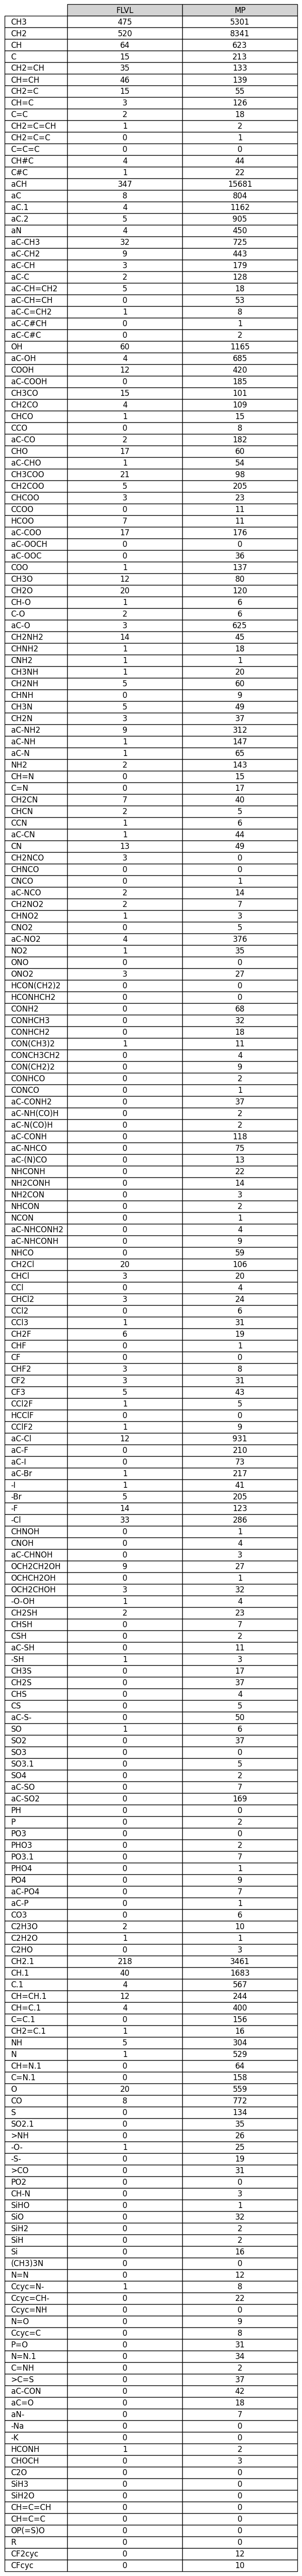

In [5]:
fig, ax = plt.subplots()
ax.axis('off')  
table = ax.table(cellText=df_sum_fg.values, colLabels=df_sum_fg.columns, rowLabels=df_sum_fg.index, loc='center', cellLoc='center', colColours=['lightgray'] * df_sum_fg.shape[1])
table.auto_set_font_size(False)
table.set_fontsize(12)

table.scale(1, 1.5)

2.4 Heatmaps for showing the appearance of each group in every dataset (0 for not appearing, and 1 for appearing)

In [21]:
from matplotlib.colors import LinearSegmentedColormap

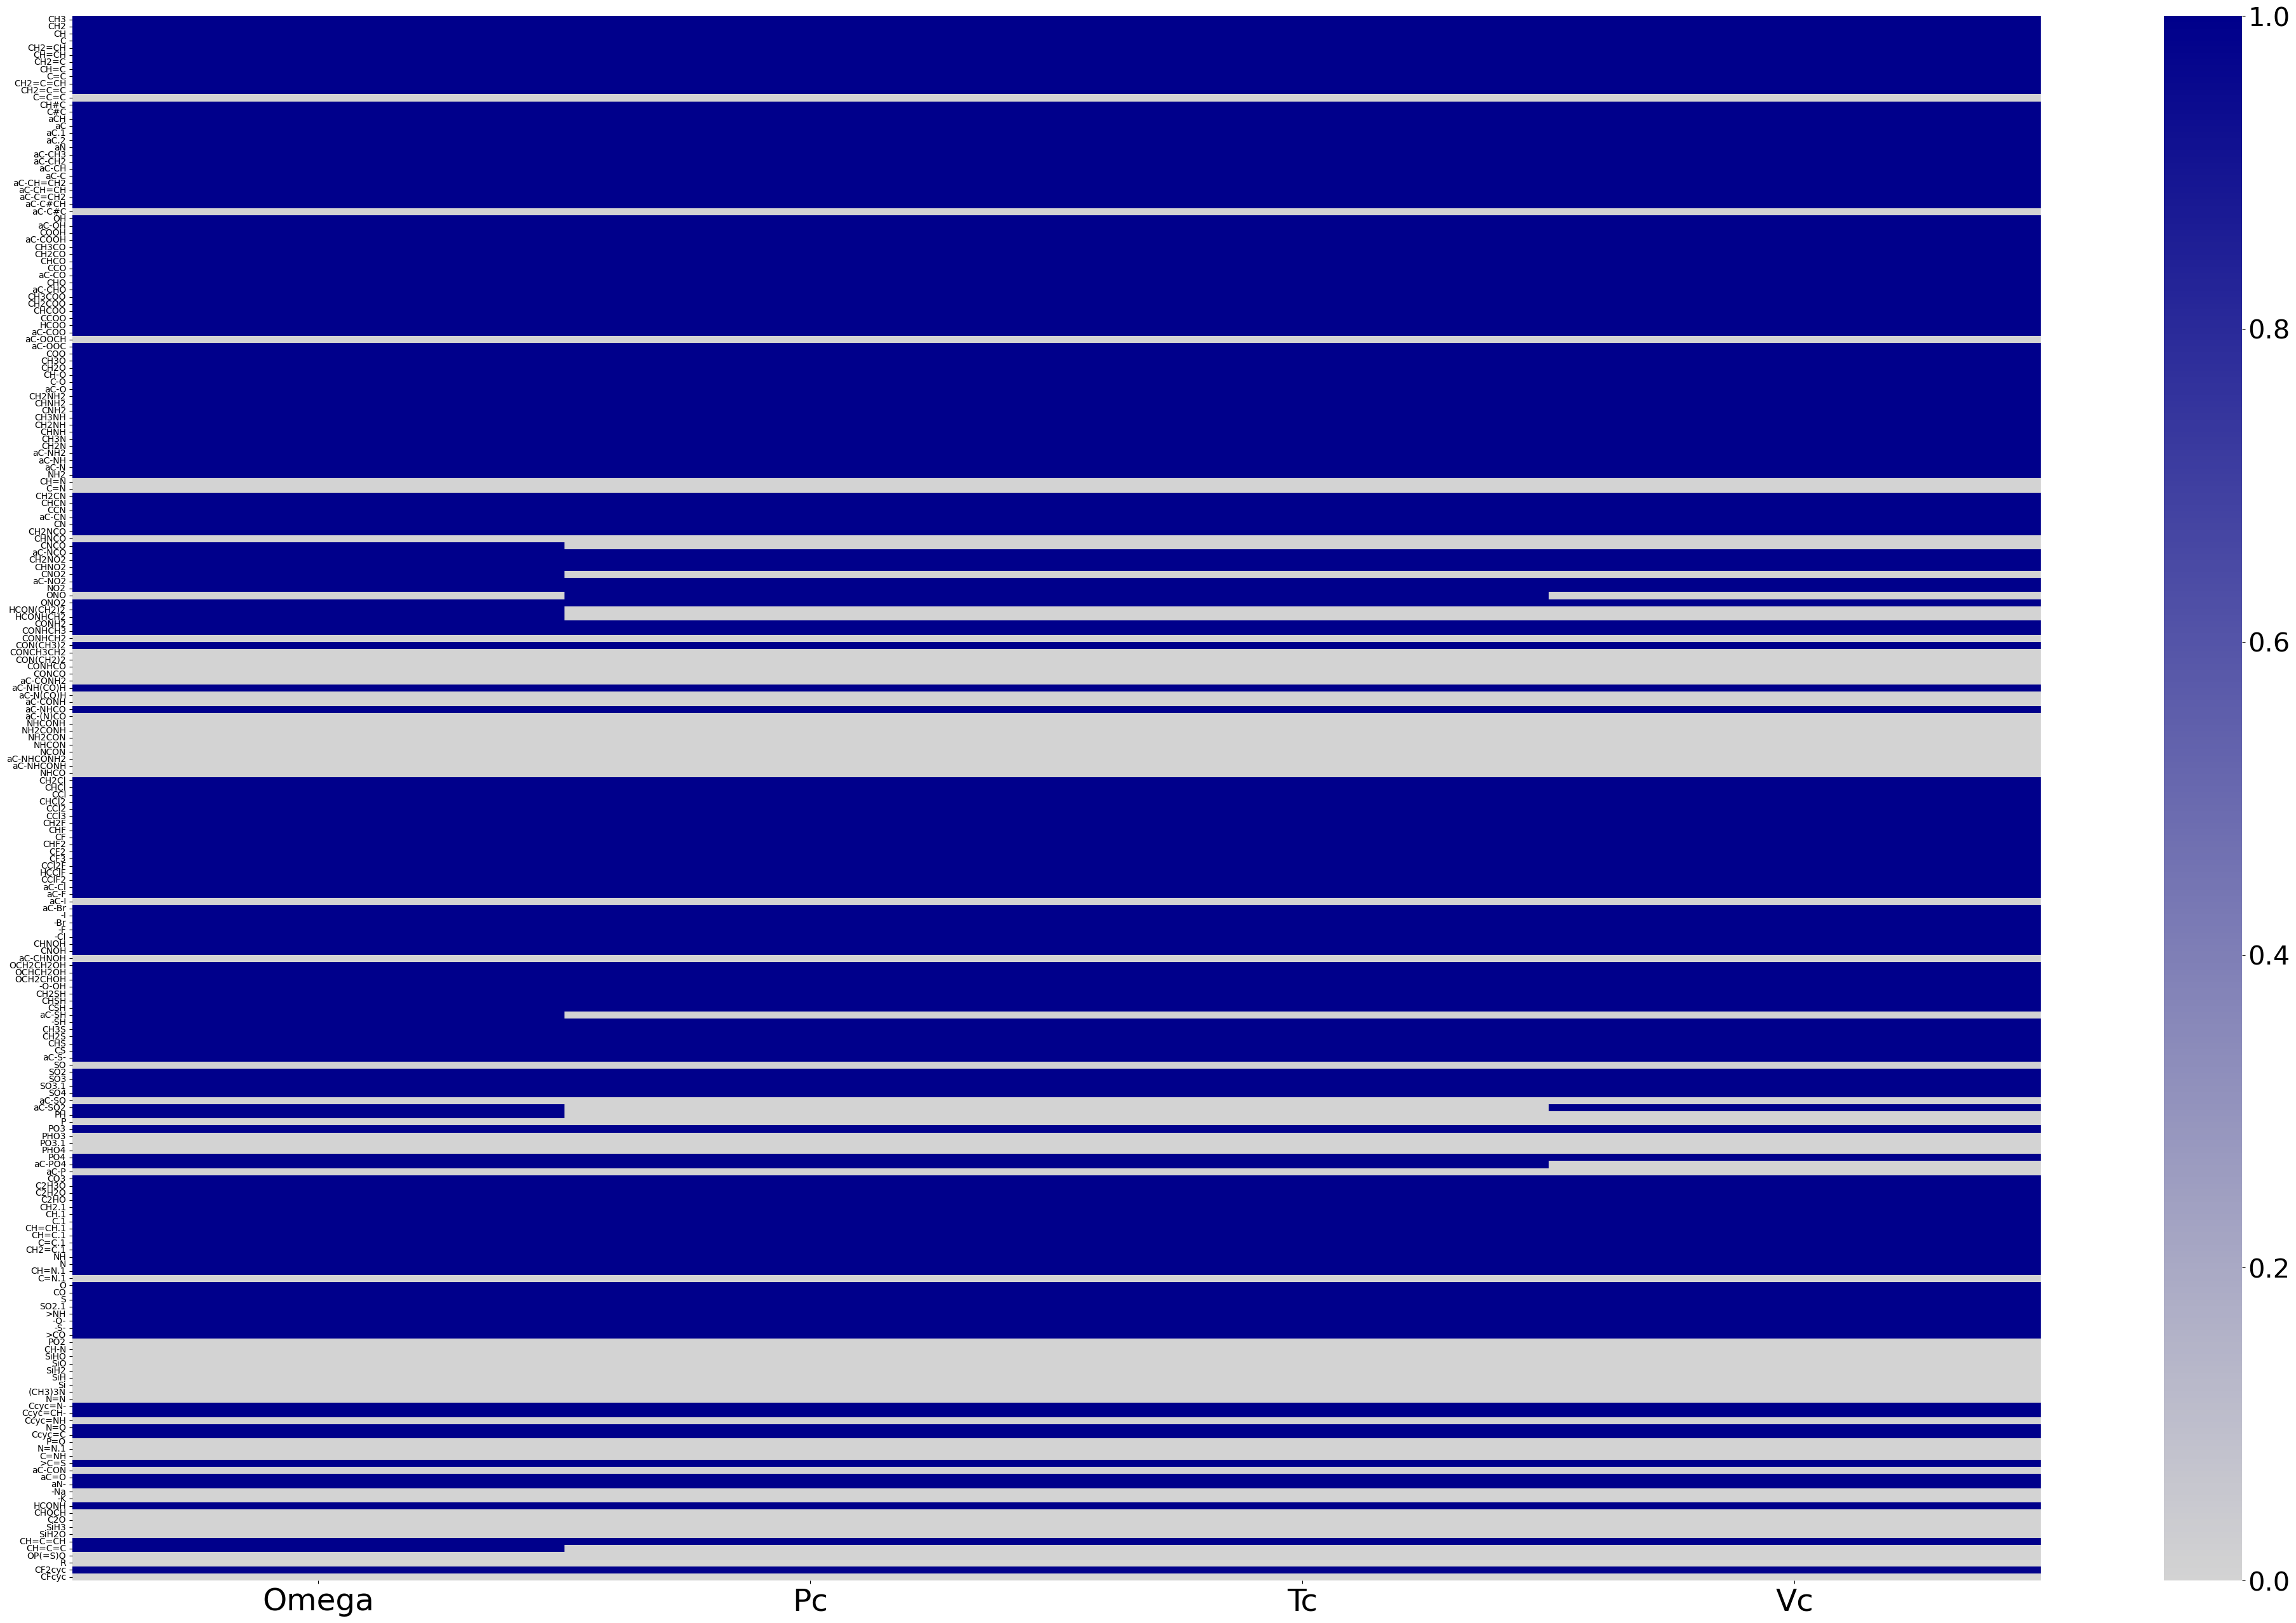

In [64]:
cmap = LinearSegmentedColormap.from_list(
    'custom_cmap', 
    [(0, '#d3d3d3'), (1, '#00008b')], 
    N=256)

df_sum_fg_1 = df_sum_fg.applymap(lambda x: 1 if x > 0 else x)

plt.figure(figsize=(50, 32))
ax = sns.heatmap(df_sum_fg_1, cmap=cmap, annot=False, cbar=True, yticklabels=True) 
plt.xticks(fontsize=35)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=30)

plt.savefig('figures/fg_heatmap_after.png', dpi=300, bbox_inches='tight')
plt.show()

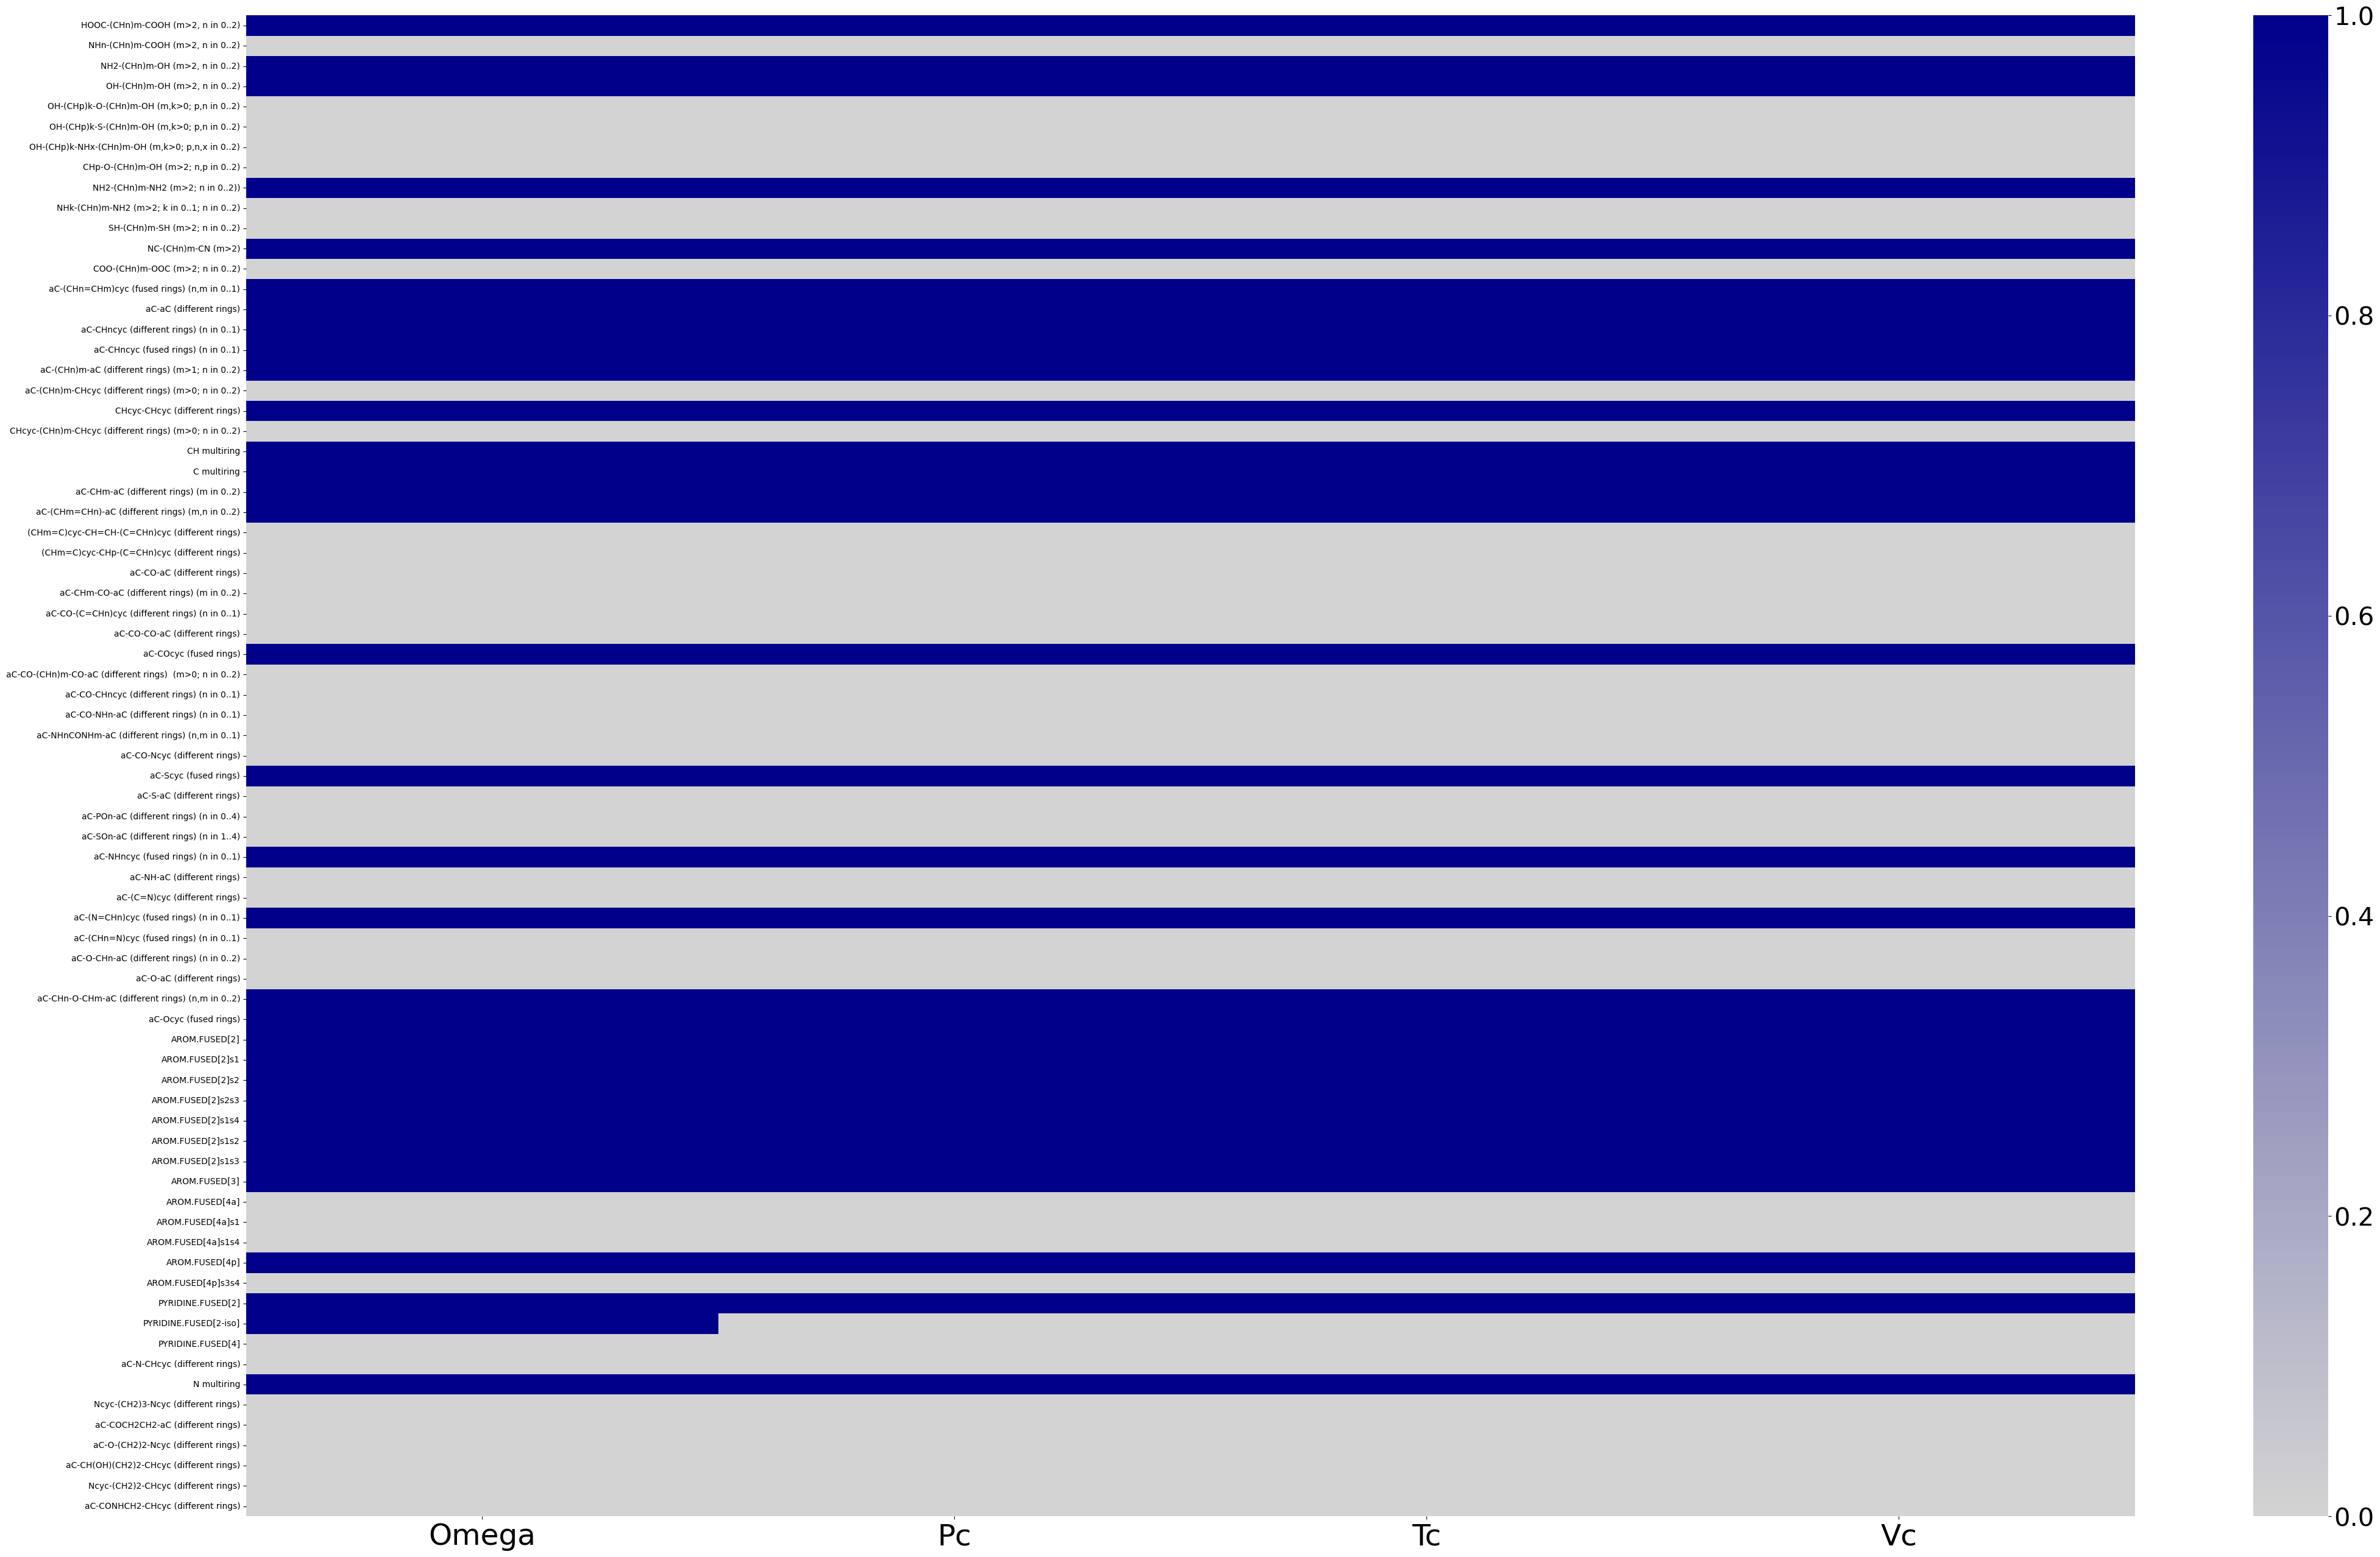

In [65]:
cmap = LinearSegmentedColormap.from_list(
    'custom_cmap', 
    [(0, '#d3d3d3'), (1, '#00008b')], 
    N=256)

df_sum_tg_1 = df_sum_tg.applymap(lambda x: 1 if x > 0 else x)

plt.figure(figsize=(50, 32))
ax = sns.heatmap(df_sum_tg_1, cmap=cmap, annot=False, cbar=True, yticklabels=True) 
plt.xticks(fontsize=35)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=30)

plt.savefig('figures/tg_heatmap_after.png', dpi=300, bbox_inches='tight')
plt.show()

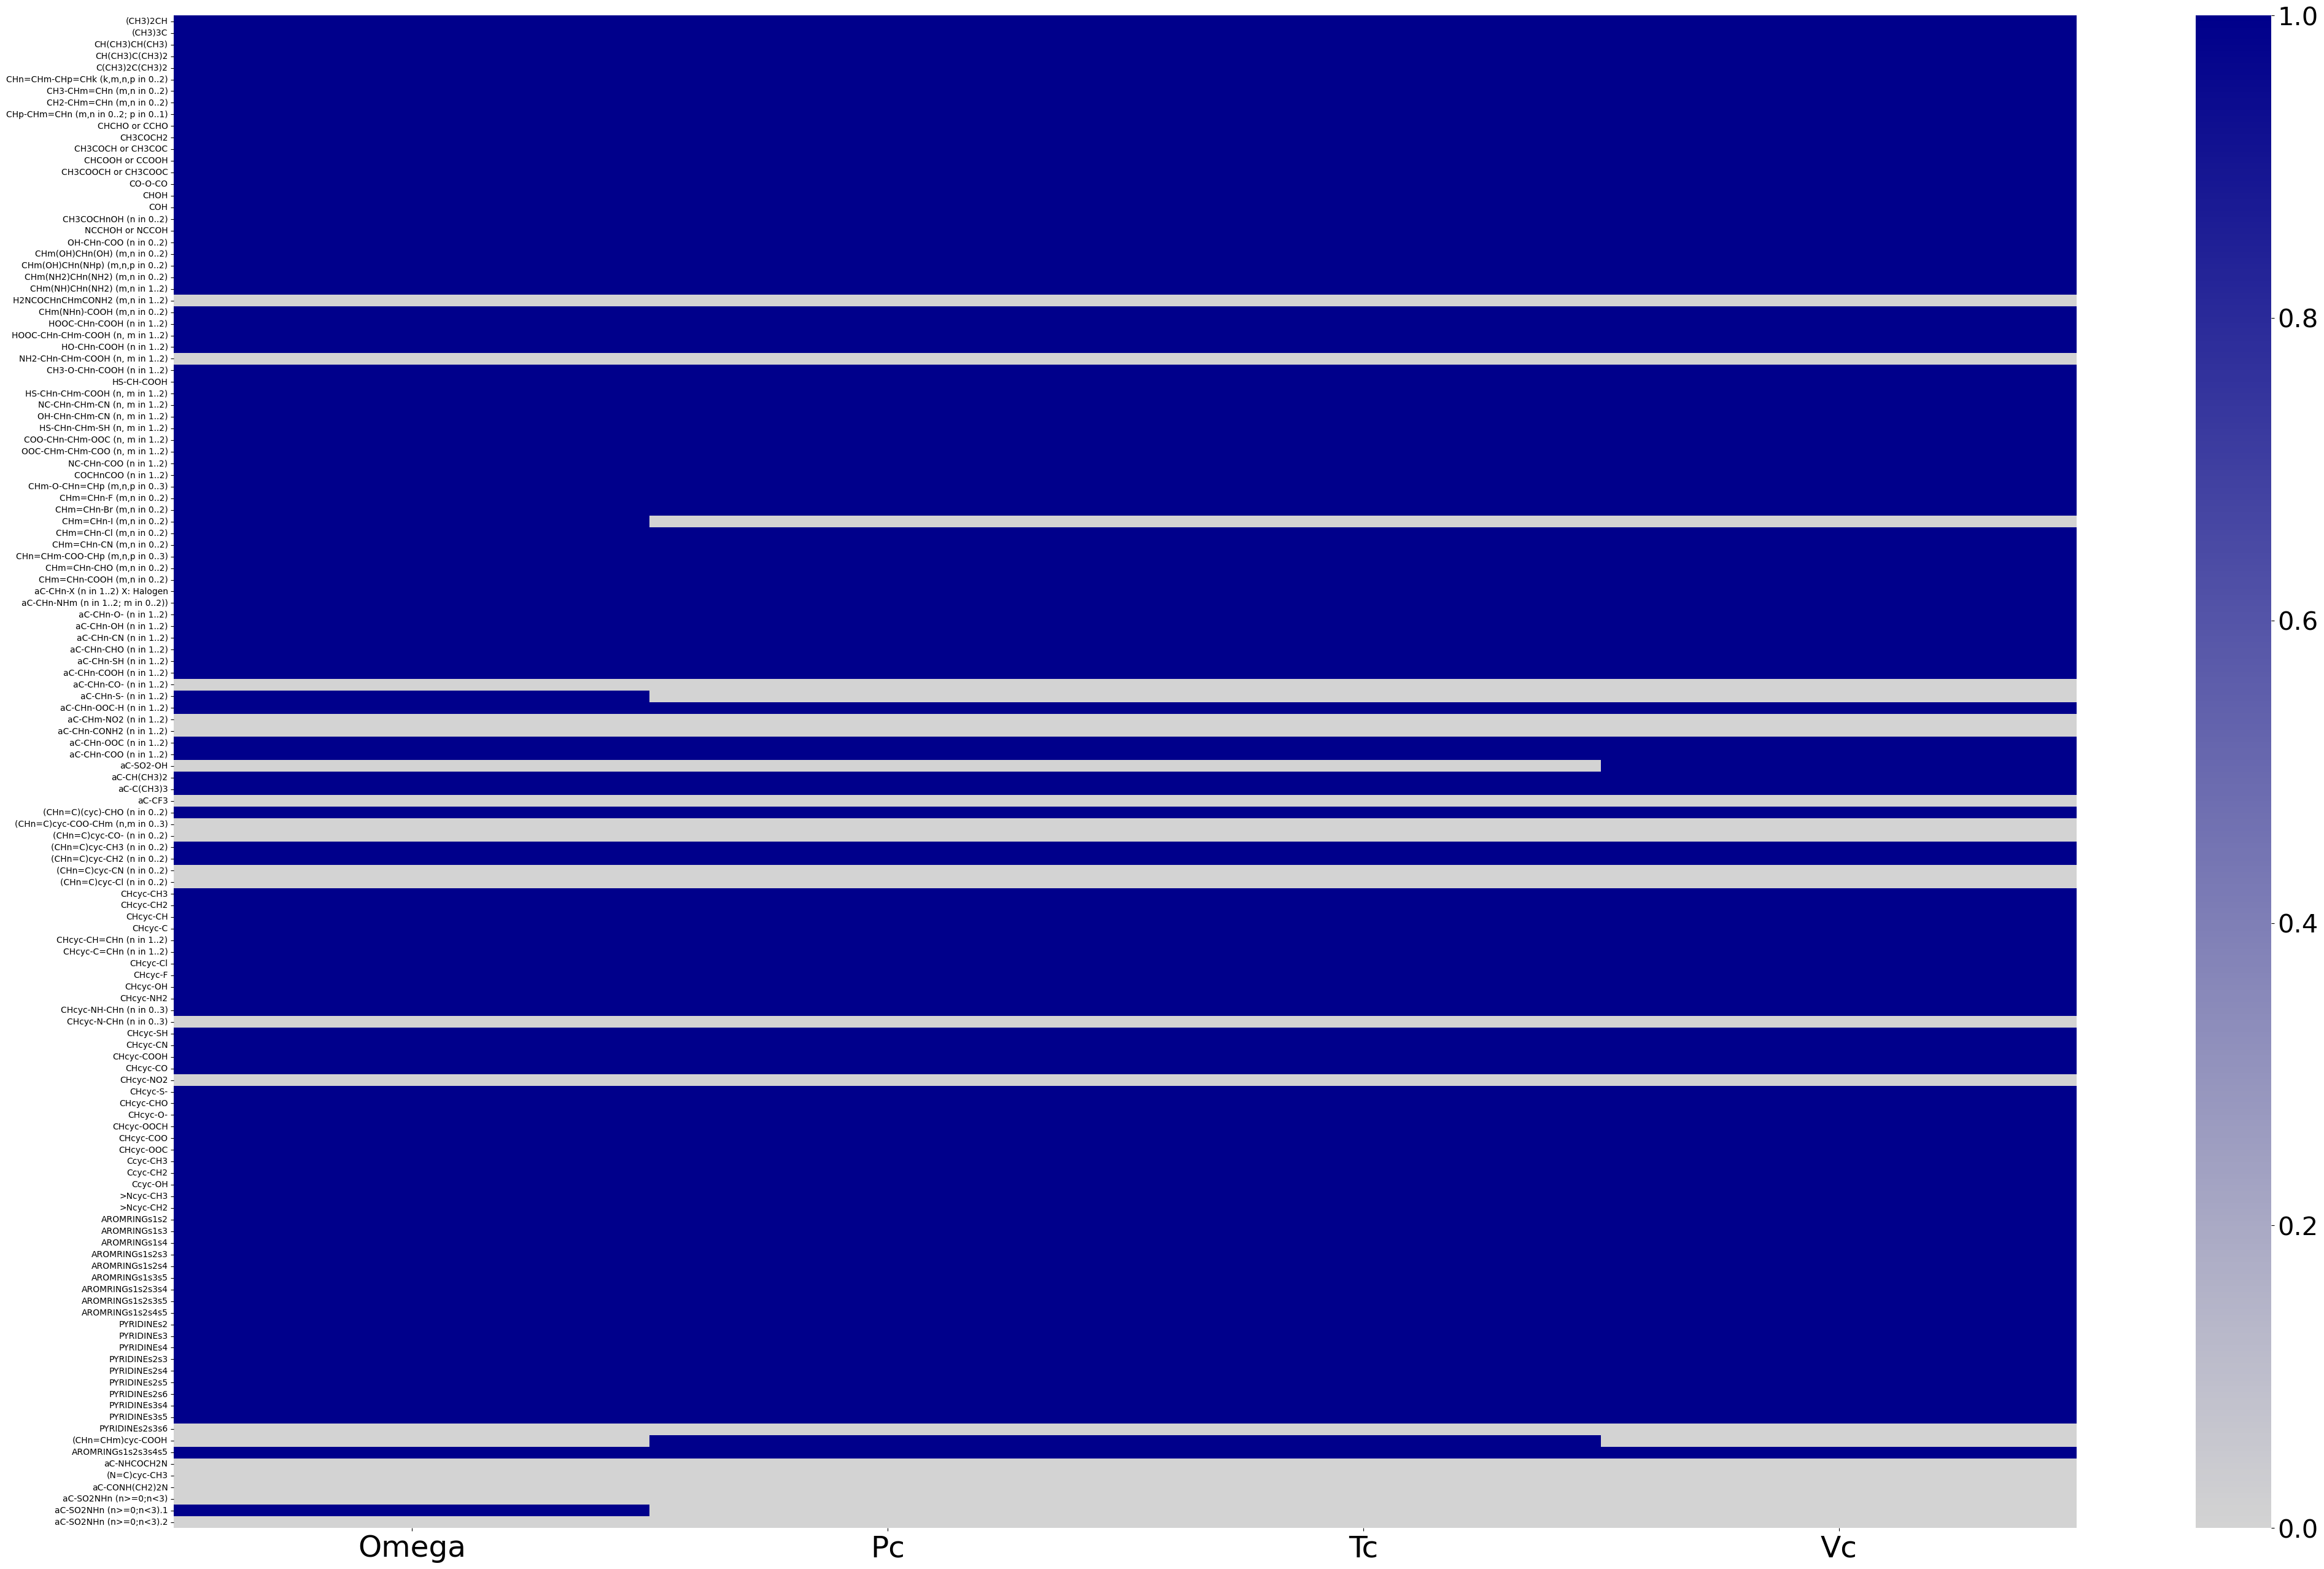

In [66]:
cmap = LinearSegmentedColormap.from_list(
    'custom_cmap', 
    [(0, '#d3d3d3'), (1, '#00008b')], 
    N=256)

df_sum_sg_1 = df_sum_sg.applymap(lambda x: 1 if x > 0 else x)

plt.figure(figsize=(50, 32))
ax = sns.heatmap(df_sum_sg_1, cmap=cmap, annot=False, cbar=True, yticklabels=True) 
plt.xticks(fontsize=35)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=30)

plt.savefig('figures/sg_heatmap_after.png', dpi=300, bbox_inches='tight')
plt.show()

2.5 Distirbution 

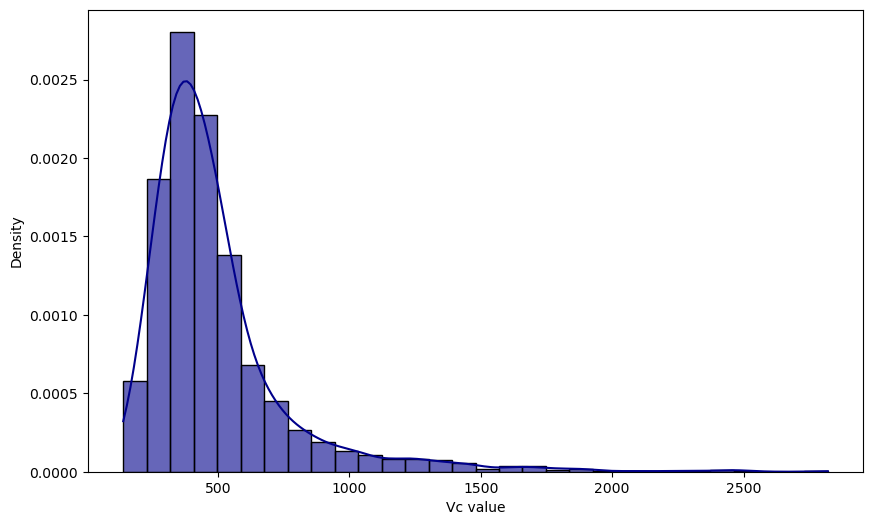

In [2]:
prop_tag = 'Vc'

df = pd.read_excel('data/new_excels/Vc.xlsx')

df['Const_Value'] = df['Const_Value']*1000

plt.figure(figsize=(10, 6))

sns.histplot(df['Const_Value'], bins=30, kde=True, color='#00008b', alpha=0.6,stat='density')

plt.xlabel(prop_tag + ' value')
plt.ylabel('Density')

plt.savefig('figures/distribution_'+ prop_tag +'.png', dpi=300, bbox_inches='tight')
plt.show()

#### 3 Class identification with classyFire
3.1 Run get_classyfire_info.py for deriving the detailed information of each molecules in the dataset

In [54]:
%run get_classyfire_info.py

100%|████████████████████████████████████████████████████████████████████████████████| 438/438 [09:11<00:00,  1.26s/it]

Some InChikeys were not available. Please check "Missing_ichikeys.txt" file.


3.2 For the returned .txt files with inchikeys of missing compounds, transferring them to .csv files and then re-processing them with get_newly_classified_classyfire_info.py

In [65]:
classyfire_path = 'external/Missing_ichikeys.txt' 
missing_comp_columns = {'Internal_ID': [], 'Inchikey': []} 

with open(classyfire_path, 'r') as file:
    lines = file.readlines()[1:]
    for line in lines:
        parts = line.strip().split('   ')
        if len(parts) == 2:
            missing_comp_columns['Internal_ID'].append(parts[0])
            missing_comp_columns['Inchikey'].append(parts[1])
        else:
            print(f"Skipped line: {line}")
        
df_missing_comp = pd.DataFrame(missing_comp_columns)

output_csv_file = 'external/Missing_compounds_classyfire.csv'  
df_missing_comp.to_csv(output_csv_file, index=False) 

In [66]:
%run get_newly_classified_classyfire_info.py

11
13
14
15
17
18
19
21
22
23
25
26
27 HGINCPLSRVDWNT-UHFFFAOYSA-N
27
29 HUMNYLRZRPPJDN-UHFFFAOYSA-N
29
30
31 MLUCVPSAIODCQM-NSCUHMNNSA-N
31
33 ZTQSAGDEMFDKMZ-UHFFFAOYSA-N
33
34 IKHGUXGNUITLKF-UHFFFAOYSA-N
34
35
37 RTZKZFJDLAIYFH-UHFFFAOYSA-N
37
38 XJRBAMWJDBPFIM-UHFFFAOYSA-N
38
40 NUMQCACRALPSHD-UHFFFAOYSA-N
40
41 LCGLNKUTAGEVQW-UHFFFAOYSA-N
41
42
43 BZLVMXJERCGZMT-UHFFFAOYSA-N
43
45 QYKIQEUNHZKYBP-UHFFFAOYSA-N
45
46 NVJUHMXYKCUMQA-UHFFFAOYSA-N
46
47
49 QTYARKOMFKRPSY-UHFFFAOYSA-N
49
50 UAEPNZWRGJTJPN-UHFFFAOYSA-N
50
51 IIEWJVIFRVWJOD-UHFFFAOYSA-N
51
53
54 KDIAMAVWIJYWHN-UHFFFAOYSA-N
54
56 HSFWRNGVRCDJHI-UHFFFAOYSA-N
56
57 XNMQEEKYCVKGBD-UHFFFAOYSA-N
57
58
60 YHASWHZGWUONAO-UHFFFAOYSA-N
60
61 LSACYLWPPQLVSM-UHFFFAOYSA-N
61
62 WFDIJRYMOXRFFG-UHFFFAOYSA-N
62
64
65 IWDCLRJOBJJRNH-UHFFFAOYSA-N
65
66 NXXYKOUNUYWIHA-UHFFFAOYSA-N
66
67 RLSSMJSEOOYNOY-UHFFFAOYSA-N
67
69
70 JLTDJTHDQAWBAV-UHFFFAOYSA-N
70
72 JUJWROOIHBZHMG-UHFFFAOYSA-N
72
73 OJGMBLNIHDZDGS-UHFFFAOYSA-N
73
74
76 BSKHPKMHTQYZBB-U

421 AZUXKVXMJOIAOF-UHFFFAOYSA-N
421
423 FKRCODPIKNYEAC-UHFFFAOYSA-N
423
424
425 QGJOPFRUJISHPQ-UHFFFAOYSA-N
425
427 YTPLMLYBLZKORZ-UHFFFAOYSA-N
427
428 RAOIDOHSFRTOEL-UHFFFAOYSA-N
428
429
431 BAPJBEWLBFYGME-UHFFFAOYSA-N
431
432 CFVWNXQPGQOHRJ-UHFFFAOYSA-N
432
433 GOXQRTZXKQZDDN-UHFFFAOYSA-N
433
435
436 JIGUQPWFLRLWPJ-UHFFFAOYSA-N
436
437 CQEYYJKEWSMYFG-UHFFFAOYSA-N
437


3.3 Counting the number of the compounds in each class, and displaying the results in a bar chart

In [90]:
json_folder = 'external/classyfire_data/'  
json_folder_missing = 'external/classyfire_data_newly_classified'

class_data = {}
json_folders = [json_folder, json_folder_missing]

for folder_path in json_folders:
    for json_file in os.listdir(json_folder):
        if json_file.endswith('.json'):
            json_file_path = os.path.join(json_folder, json_file)
                  
            with open(json_file_path, 'r') as json_file:
                data = json.load(json_file)
                
            desired_class = data.get('class', None) 
            name = None
            if desired_class:
                name = desired_class.get('name', None)
            
            if name:
                if name in class_data:
                    class_data[name] += 1
                else:
                    class_data[name] = 1
            
                            
# for json_file in os.listdir(json_folder):
#     if json_file.endswith('.json'):
#         json_file_path = os.path.join(json_folder, json_file)

#         with open(json_file_path, 'r') as json_file:
#             data = json.load(json_file)

#         #change the required class here    
#         subclass = data.get('class', None) 
#         name = None
#         if subclass:
#             name = subclass.get('name', None)

#         if name:
#             if name in class_data:
#                 class_data[name] += 1
#             else:
#                 class_data[name] = 1
                

df_class_FLVL = pd.DataFrame(class_data.items(), columns=['name', 'count'])

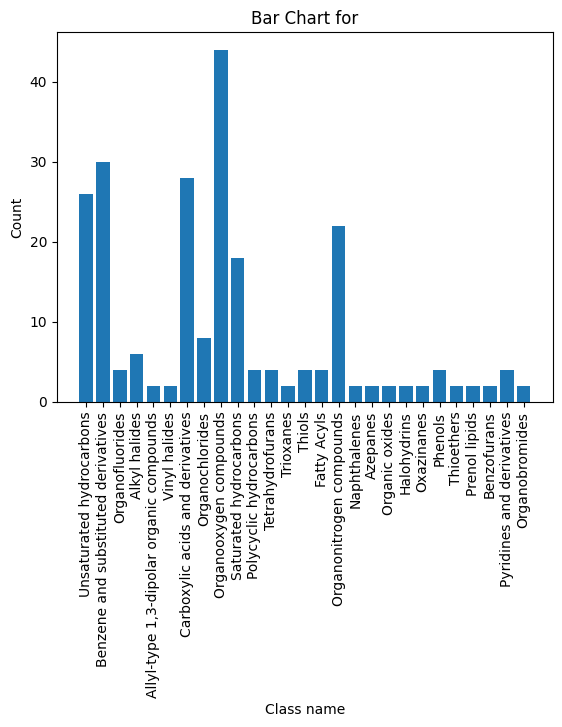

In [94]:
plt.bar(df_class_FLVL['name'], df_class_FLVL['count'])
plt.xlabel('Class name')
plt.ylabel('Count')
plt.title('Bar Chart for' )
plt.xticks(rotation=90)
plt.show()